In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
df = pd.read_csv("NSE-GLOBAL.csv")
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


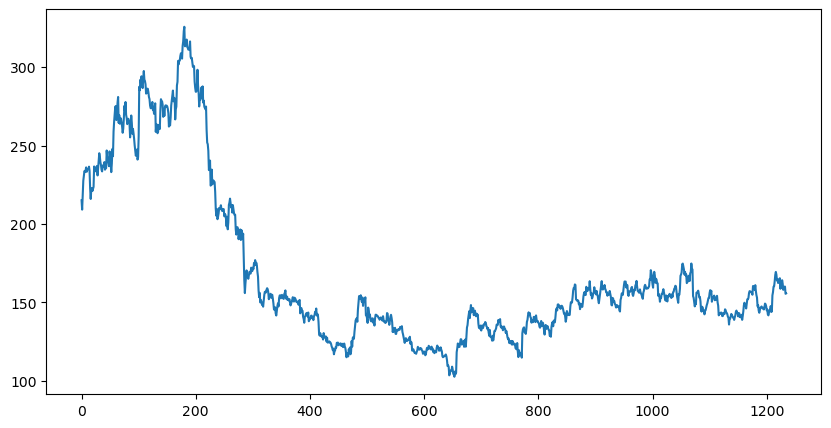

In [26]:
plt.figure(figsize = (10,5))
plt.plot(df['Close'], label = 'Closing Price');

In [27]:
df['Open - Close'] = df['Open'] - df['Close']
df['High - Low'] = df['High'] - df['Low']
df = df.dropna()

In [28]:
x = df[['Open - Close', 'High - Low']]
x.head()

,Open - Close,High - Low
0,-7.15,15.40
1,7.80,12.70
2,5.30,11.65
3,2.40,11.75
4,3.65,13.55


In [29]:
y = np.where(df['Close'].shift(-1)>df['Close'],1,-1)
y

array([-1,  1,  1, ..., -1,  1, -1])

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=45)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [32]:
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn = neighbors.KNeighborsClassifier()
model = GridSearchCV(knn, params, cv=5)
model.fit(x_train,y_train)
accuracy_train = accuracy_score(y_train, model.predict(x_train))
accuracy_test = accuracy_score(y_test, model.predict(x_test))

In [33]:
print('Train data accuracy: %.2f' %accuracy_train)
print('Test data accuracy: %.2f' %accuracy_test)

Train data accuracy: 0.87
Test data accuracy: 0.88


In [34]:
pre = model.predict(x_test)
pre_df = pd.DataFrame({'Actual CLass':y_test, 'Predicted Class': pre})

In [39]:
pre_df.head()

,Actual CLass,Predicted Class
0,-1,-1
1,-1,-1
2,-1,-1
3,1,1
4,-1,-1


In [40]:
yd = df['Close']

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors

In [44]:
x_train_reg, x_test_reg, y_train_reg, y_test_reg = train_test_split(x,y,test_size=0.25,random_state=45)
params = {'n_neighbors': [2,3,4,5,6,7,8,9,10,11,12,13,14,15]}
knn_reg = neighbors.KNeighborsRegressor()
model_reg = GridSearchCV(knn_reg, params, cv=5)
model_reg.fit(x_train_reg,y_train_reg)
prediction = model_reg.predict(x_test_reg)

In [55]:
rms = np.sqrt(np.mean(np.power((np.array(y_test)-np.array(prediction)),2)))
rms

0.5761157740535046

In [56]:
check = pd.DataFrame({'Actual CLass': y_test_reg, 'Predicted Class': prediction})

In [57]:
check.head()

,Actual CLass,Predicted Class
0,-1,-0.866667
1,-1,-0.733333
2,-1,-1.000000
3,1,1.000000
4,-1,-0.733333
